In [67]:
import os
import json
from mathutils import Matrix
import numpy as np
from scipy.spatial.transform import Rotation

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from collections import Counter

In [73]:
# Specify the path to the dataset folder
dataset_path = 'data/train'

scenes = {}
i = 0

for scan_folder in os.listdir(dataset_path):
    scan_folder_path = os.path.join(dataset_path, scan_folder)
    
    if i >=10:
        break

    # Check if the folder contains semseg.v2.json file
    semseg_file = os.path.join(scan_folder_path, 'semseg.v2.json')
    if not os.path.isfile(semseg_file):
        continue

    # Read and parse the semseg.v2.json file
    with open(semseg_file, 'r') as file:
        semseg_data = json.load(file)

    scan_id = semseg_data['scan_id']
    seg_groups = semseg_data['segGroups']
    
    extracted_objects = []

    # Extract individual objects
    for object_data in seg_groups:
        obj = {}
        # Extract necessary data from JSON
        axes_lengths = object_data['obb']['axesLengths']
        centroid = object_data['obb']['centroid']
        normalized_axes = object_data['obb']['normalizedAxes']
        rotation_matrix = np.transpose(np.array(normalized_axes).reshape(3, 3))
        
        rotation = Rotation.from_matrix(rotation_matrix)
        euler_angles = rotation.as_euler('xyz', degrees=False) # degrees in radians
        
        # faking it: align the rotations hardcoding
        #comparison_angles = [0.698, 2.269]
        #differences = np.abs(euler_angles[2] - comparison_angles)
        #closest_index = np.argmin(differences)
        #euler_angles[2] = comparison_angles[closest_index]
        
        # Print the extracted data for each object
        obj['id'] = object_data['objectId']
        obj['label'] = object_data['label']
        obj['location'] = centroid
        obj['size'] = axes_lengths
        obj['euler_angles'] = euler_angles
        
        if np.all(np.round(object_data['dominantNormal']) == np.array([0, -0, 1])):
            obj['dominantNormal'] = 1
        else:
            obj['dominantNormal'] = 0

        extracted_objects.append(obj)
        
    i += 1
    print(scan_id)
    scenes[scan_id] = extracted_objects

f4f31600-8408-2255-971c-b8c20605563a
b8837e3a-57ec-29c6-8b54-d440ca79a11f
b901681d-e754-293c-8cb3-22aae72dbd42
352e9c3e-69fb-27a7-8976-a6860f84f876
4d3d82a2-8cf4-2e04-810b-7634c83eed98
bf9a3dba-45a5-2e80-8282-0ee19d0447c7
9c27de4d-6184-2cda-80c6-174eddb07154
6a36054b-fa53-2915-946e-4ec15f811f6e
6bde6091-9162-246f-8ea8-fdfd6c0a7f77
0cac767e-8d6f-2d13-8d1a-d5e9b184df15


### Analysis of a single unfiltered scene

In [40]:
scan_id = '0ad2d3a3-79e2-2212-9a51-9094be707ec2'
#scan_id = '754e884c-ea24-2175-8b34-cead19d4198d'

# number of objects in scene
total_objects = len(scenes[scan_id])
print("Total objects:", total_objects)
print('---')

# Create an empty dictionary to store label counts
label_counts = {}

# Count the occurrences of each label
for item in scenes[scan_id]:
    label = item['label']
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

# Print the label counts
for label, count in label_counts.items():
    print(label, count)

Total objects: 18
---
floor 1
wall 4
ceiling 1
sink 1
stool 1
mirror 1
shower curtain 1
shower 1
door 1
toilet 1
bucket 1
trash can 1
hair dryer 1
shelf 1
toilet paper dispenser 1


### Analysis of all unfiltered scenes

Number of Scenes:  385
[37, 13, 41, 31, 11, 21, 25, 12, 16, 65, 54, 27, 26, 43, 48, 20, 33, 45, 40, 61, 14, 29, 29, 75, 52, 21, 21, 8, 28, 16, 29, 26, 58, 39, 35, 37, 42, 48, 69, 41, 25, 9, 34, 69, 7, 32, 31, 27, 52, 13, 19, 39, 39, 20, 36, 29, 33, 48, 14, 35, 29, 13, 35, 18, 14, 28, 39, 34, 21, 32, 32, 27, 21, 12, 55, 43, 17, 29, 16, 44, 14, 45, 12, 13, 28, 25, 17, 33, 23, 12, 40, 33, 17, 8, 30, 35, 16, 41, 2, 69, 29, 81, 41, 15, 34, 48, 39, 17, 25, 46, 42, 24, 35, 27, 22, 35, 24, 17, 32, 41, 9, 32, 28, 54, 48, 28, 17, 43, 13, 23, 39, 15, 33, 27, 28, 27, 23, 30, 44, 33, 13, 39, 47, 39, 14, 23, 32, 25, 73, 38, 23, 39, 48, 8, 62, 15, 35, 33, 37, 52, 35, 59, 30, 40, 47, 44, 10, 13, 18, 31, 16, 21, 47, 27, 22, 31, 17, 15, 63, 33, 25, 11, 17, 47, 28, 39, 28, 13, 3, 50, 29, 27, 45, 38, 20, 44, 19, 34, 18, 41, 25, 22, 24, 37, 21, 36, 62, 20, 22, 31, 10, 25, 7, 6, 48, 30, 11, 34, 39, 8, 42, 10, 31, 44, 40, 58, 77, 74, 30, 50, 27, 28, 47, 5, 34, 21, 19, 22, 14, 16, 31, 22, 12, 31, 43, 19, 3, 3

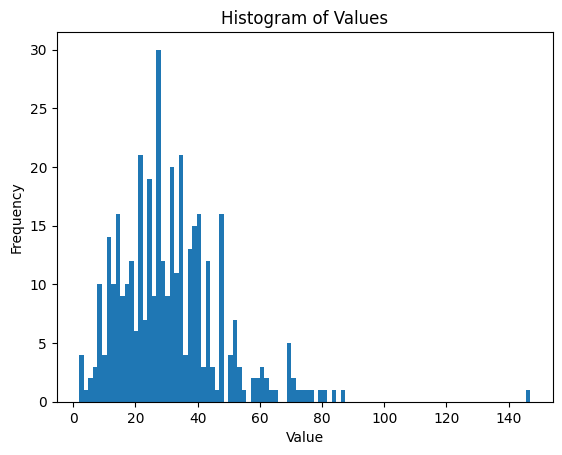

In [41]:
# number of scenes
print('Number of Scenes: ', len(scenes))

total_objects = []
for scan_id in scenes:
    total_objects.append(len(scenes[scan_id]))
print(total_objects)

# Create a histogram
plt.hist(total_objects, bins=100)  # Specify the number of bins or customize as needed

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

# Display the histogram
plt.show()

## Filtering Scenes

In [74]:
filtered_scenes = {}
for scan_id in scenes:
    
    # Filter out objects with specified labels
    labels_to_remove = ['ceiling', 'wall', 'floor', 'plant', 'window', 'windowsill', 'shades', \
                       'wall frame', 'wall /other room', 'upholstered wall', 'glass wall', 'wall plants', \
                        'slanted wall', 'floor /other room', 'plants', 'doorframe', 'blinds', 'flowers']
    filtered_scenes[scan_id] = [obj for obj in scenes[scan_id] if obj['label'] not in labels_to_remove]
    
    # Filter out objects with problematic dominant normal
    filtered_scenes[scan_id] = [obj for obj in filtered_scenes[scan_id] if obj['dominantNormal']!=1]
    
    # Filter out objects, if we have too many
    limit = 20
    filtered_scenes[scan_id] = filtered_scenes[scan_id][:20]


### Analysis of a single filtered scene

In [51]:
scan_id = '0ad2d3a3-79e2-2212-9a51-9094be707ec2'
#scan_id = '754e884c-ea24-2175-8b34-cead19d4198d'

total_objects = len(filtered_scenes[scan_id])
print("Total objects:", total_objects)
print('---')

# Create an empty dictionary to store label counts
label_counts = {}

# Count the occurrences of each label
for item in filtered_scenes[scan_id]:
    label = item['label']
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

# Print the label counts
for label, count in label_counts.items():
    print(label, count)

Total objects: 9
---
sink 1
stool 1
mirror 1
shower curtain 1
door 1
toilet 1
hair dryer 1
shelf 1
toilet paper dispenser 1


### Plot a single filtered Scene

sink
[1.57079633 0.         1.43561073]
stool
[1.57079633 0.         1.24575173]
mirror
[ 1.57079633e+00 -2.22044605e-16  1.44913485e+00]
shower curtain
[ 1.57079633  0.         -0.12083885]
shower
[ 1.57079633  0.         -0.56037308]
door
[ 1.57079633e+00 -2.22044605e-16  2.15378416e+00]
toilet
[ 1.57079633  0.         -0.25762219]
bucket
[ 1.57079633e+00 -2.22044605e-16  1.52136436e+00]
trash can
[ 1.57079633e+00 -4.44089210e-16  1.06410819e+00]
hair dryer
[ 1.57079633  0.         -0.2447968 ]
shelf
[ 1.57079633e+00 -2.22044605e-16  1.46217619e+00]
toilet paper dispenser
[ 1.57079633e+00 -2.22044605e-16  1.37705435e+00]


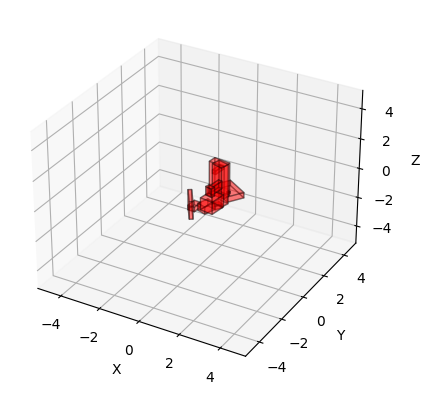

In [46]:
scan_id = '0ad2d3a3-79e2-2212-9a51-9094be707ec2'
#scan_id = '754e884c-ea24-2175-8b34-cead19d4198d'

# Create a 3D plot
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')

# Visualize objects in the scene
for object_data in filtered_scenes[scan_id]:

    # Extract necessary data from the object
    location = object_data['location']
    size = object_data['size']
    euler_angles = object_data['euler_angles']
    
    print(object_data['label'])
    print(object_data['euler_angles'])
    
    rotation = Rotation.from_euler('xyz', euler_angles)
    rotation_matrix = rotation.as_matrix()
        

    # Compute half-lengths along each axis
    half_lengths = np.array(size) / 2

    # Define relative coordinates of object's corners in local frame
    corners = np.array([
        [-1, -1, -1],  # Corner 1
        [-1, -1, 1],   # Corner 2
        [-1, 1, -1],   # Corner 3
        [-1, 1, 1],    # Corner 4
        [1, -1, -1],   # Corner 5
        [1, -1, 1],    # Corner 6
        [1, 1, -1],    # Corner 7
        [1, 1, 1]      # Corner 8
    ])
    scaled_corners = corners * half_lengths
    relative_corners = np.transpose(scaled_corners)

    relative_corners_4 = np.vstack((relative_corners, np.ones(relative_corners.shape[1])))

    transformation_matrix = np.eye(4)
    transformation_matrix[:3, :3] = rotation_matrix
    transformation_matrix[:3, 3] = location

    global_corners_4 = np.matmul(transformation_matrix, relative_corners_4)
    global_corners = np.transpose(global_corners_4[:3, :])
    
    polygons = [
        [global_corners[0], global_corners[1], global_corners[3], global_corners[2]],
        [global_corners[4], global_corners[5], global_corners[7], global_corners[6]],
        [global_corners[0], global_corners[1], global_corners[5], global_corners[4]],
        [global_corners[2], global_corners[3], global_corners[7], global_corners[6]],
        [global_corners[0], global_corners[2], global_corners[6], global_corners[4]],
        [global_corners[1], global_corners[3], global_corners[7], global_corners[5]]
    ]
    
    # Create the 3D collection and add it to the plot
    collection = Poly3DCollection(polygons, alpha=0.3, facecolor='red', edgecolor='black')
    ax.add_collection3d(collection)
    

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the limits of the plot's axes
factor = 5
x_min, x_max, y_min, y_max, z_min, z_max = -factor, factor, -factor, factor, -factor, factor
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

# Show the plot
plt.show()

## Analysis of all filtered scenes

[14, 9, 16, 17, 1, 10, 14, 3, 3, 20, 20, 14, 11, 17, 20, 11, 16, 19, 20, 20, 5, 13, 14, 20, 20, 10, 2, 0, 19, 7, 16, 13, 20, 20, 17, 20, 20, 20, 20, 18, 14, 1, 14, 17, 2, 14, 18, 14, 20, 5, 7, 19, 20, 10, 19, 12, 12, 20, 4, 17, 18, 5, 18, 7, 4, 9, 14, 15, 4, 18, 14, 12, 10, 7, 17, 20, 4, 16, 10, 20, 6, 17, 5, 3, 14, 8, 5, 17, 6, 6, 14, 18, 7, 5, 18, 9, 5, 20, 0, 20, 12, 20, 20, 9, 18, 20, 17, 9, 12, 20, 20, 10, 14, 9, 15, 10, 16, 9, 14, 20, 4, 17, 15, 20, 20, 16, 6, 20, 7, 10, 15, 6, 12, 16, 14, 13, 12, 15, 20, 15, 9, 17, 20, 20, 8, 9, 12, 11, 20, 20, 12, 20, 20, 4, 20, 5, 15, 14, 20, 20, 19, 20, 13, 19, 20, 20, 2, 6, 9, 16, 7, 8, 20, 15, 9, 9, 8, 4, 20, 17, 16, 6, 4, 20, 12, 16, 13, 3, 0, 20, 8, 17, 20, 20, 9, 20, 5, 14, 4, 20, 17, 7, 10, 19, 6, 15, 20, 5, 11, 20, 4, 7, 5, 2, 20, 16, 4, 19, 20, 7, 16, 4, 12, 12, 20, 17, 20, 20, 13, 20, 12, 10, 20, 0, 15, 6, 9, 11, 3, 9, 14, 3, 4, 10, 20, 9, 2, 14, 6, 20, 14, 3, 1, 9, 18, 20, 10, 17, 20, 14, 15, 18, 14, 4, 20, 20, 20, 12, 8, 20, 14, 10

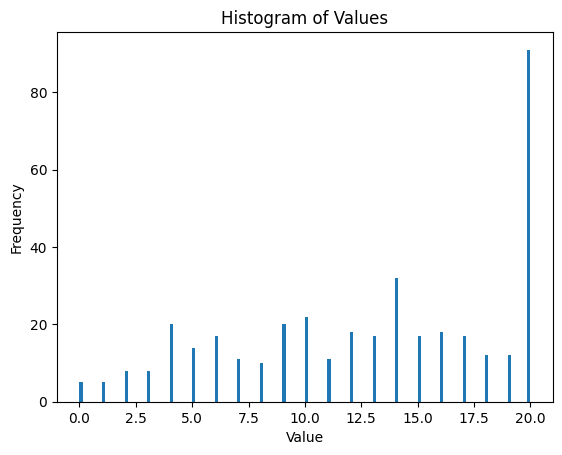

In [70]:
total_objects = []
for scan_id in filtered_scenes:
    total_objects.append(len(filtered_scenes[scan_id]))
print(total_objects)

# Create a histogram
plt.hist(total_objects, bins=140)  # Specify the number of bins or customize as needed

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

# Display the histogram
plt.show()

Counter({'chair': 485, 'shelf': 386, 'box': 265, 'door': 254, 'pillow': 231, 'curtain': 229, 'picture': 220, 'lamp': 209, 'item': 169, 'cabinet': 156, 'object': 107, 'kitchen cabinet': 99, 'table': 95, 'towel': 92, 'commode': 90, 'clothes': 90, 'wardrobe': 80, 'stool': 74, 'heater': 73, 'bag': 71, 'monitor': 68, 'trash can': 66, 'tv': 59, 'bench': 51, 'armchair': 45, 'light': 45, 'mirror': 44, 'bath cabinet': 44, 'rack': 41, 'nightstand': 40, 'radiator': 39, 'frame': 37, 'desk': 36, 'toilet': 34, 'backpack': 31, 'decoration': 31, 'cushion': 30, 'stand': 26, 'basket': 25, 'sink': 24, 'vase': 24, 'pc': 24, 'showcase': 22, 'tv stand': 21, 'clothes dryer': 21, 'pillar': 20, 'clock': 20, 'oven': 20, 'refrigerator': 19, 'clutter': 19, 'whiteboard': 18, 'bottle': 18, 'bin': 18, 'flower': 18, 'cupboard': 17, 'candle': 16, 'plank': 16, 'shower curtain': 15, 'roll': 15, 'washing machine': 15, 'bucket': 15, 'desk chair': 15, 'kitchen appliance': 15, 'window frame': 14, 'side table': 14, 'dining c

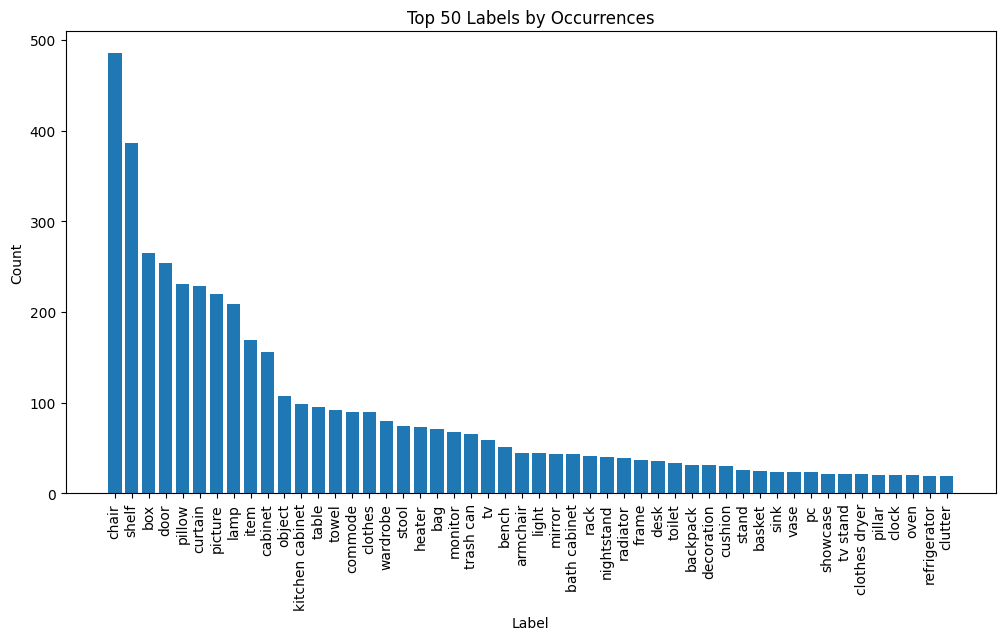

In [62]:
label_counts = Counter()

for scan_id in filtered_scenes:
    seg_groups = filtered_scenes[scan_id]
    for seg_group in seg_groups:
        label = seg_group.get("label")
        if label:
            label_counts[label] += 1

print(label_counts)

# Get the top 20 labels with the most occurrences
top_labels = label_counts.most_common(50)
labels, counts = zip(*top_labels)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar chart
plt.bar(labels, counts)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Top 50 Labels by Occurrences")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Create Scene Matrix Data

In [76]:
scene_matrices = {}
for scene_id in filtered_scenes:
    # Extract values from the dataset
    locations = np.array([obj['location'] for obj in filtered_scenes[scene_id]])
    euler_angles = np.array([obj['euler_angles'] for obj in filtered_scenes[scene_id]])
    sizes = np.array([obj['size'] for obj in filtered_scenes[scene_id]])

    # Create the matrix
    stacked_matrix = np.hstack((locations, euler_angles, sizes))
    
    # Determine the desired number of rows
    desired_rows = 20

    # Add rows of zeros to each matrix
    scene_matrices[scene_id] = np.pad(stacked_matrix, [(0, desired_rows - stacked_matrix.shape[0]), (0, 0)], mode='constant')


In [77]:
print(scene_matrices['f4f31600-8408-2255-971c-b8c20605563a'])

[[ 1.26275718e+00  3.51208396e+00 -1.30000078e-01  1.57079633e+00
   0.00000000e+00 -3.41771455e-01  9.91616681e-01  2.71999997e+00
   5.72320205e-01]
 [ 4.87943595e-01  3.53441606e+00 -4.61602562e-01  1.57079633e+00
   0.00000000e+00 -5.44060096e-01  8.70828715e-01  4.96794973e-01
   4.67499190e-01]
 [ 4.08385676e-01  3.50626931e+00 -1.00000003e+00  1.57079633e+00
   0.00000000e+00 -5.51839495e-01  7.83675936e-01  8.59999935e-01
   7.25572164e-01]
 [ 1.12023500e+00  1.62539312e+00 -2.70218065e-01  1.57079633e+00
  -2.22044605e-16  1.26660255e+00  2.56271577e+00  2.27956391e+00
   6.87327407e-01]
 [-1.45828692e+00  3.07396521e-01 -9.31165075e-01  1.57079633e+00
   0.00000000e+00 -3.51407203e-01  1.84269128e+00  9.62330022e-01
   4.68365149e-01]
 [-1.60346762e+00  3.94241420e+00 -1.21937007e+00  1.57079633e+00
  -2.22044605e-16  1.22755206e+00  7.04980628e-01  4.98739947e-01
   3.91488116e-01]
 [-2.56726053e+00  1.58343214e+00 -8.17770072e-01  1.57079633e+00
   0.00000000e+00  1.0113547